 There are total 10 classes 
 1) airplane 2) automobile 3) bird 4)cat 5)deer 6)dog 7)frog 8)horse 9)ship
 10)truck

<img src="https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/small_images.jpg?raw=1" />

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

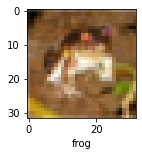

In [ ]:
plot_sample(X_train, y_train, 0)

<h4 style="color:purple">Normalizing the training data</h4>

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

 build a convolutional neural network to train our images</h4>

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4455 - accuracy: 0.4835
Epoch 2/10
1563/1563 [==============================] - 65s 42ms/step - loss: 1.0890 - accuracy: 0.6193
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9698 - accuracy: 0.6650
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8949 - accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8325 - accuracy: 0.7084
Epoch 6/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7780 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7309 - accuracy: 0.7442
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6850 - accuracy: 0.7609
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6488 - accuracy: 0.7723
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9422 - accuracy: 0.6987


[0.94222092628479, 0.6987000107765198]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.42536543e-04, 3.49743254e-06, 3.50777467e-04, 8.98510695e-01,
        1.93489323e-04, 4.89632823e-02, 4.33782041e-02, 6.38550318e-06,
        8.23505968e-03, 1.60521286e-05],
       [2.64372560e-03, 1.06626563e-02, 2.33986666e-05, 8.04032766e-07,
        1.15789710e-07, 4.29358815e-09, 7.45137186e-07, 1.71809053e-10,
        9.86346662e-01, 3.21952219e-04],
       [4.41112161e-01, 3.27256508e-02, 7.95959786e-04, 2.14864267e-03,
        2.97755232e-05, 5.01907431e-04, 4.79900191e-05, 2.06715034e-04,
        5.20159304e-01, 2.27192766e-03],
       [9.55725372e-01, 3.73348920e-03, 1.57322688e-03, 2.40531005e-03,
        3.24900873e-04, 3.02282569e-06, 1.06406305e-05, 3.76270282e-06,
        3.59251462e-02, 2.95122853e-04],
       [1.51879746e-07, 4.69626048e-06, 7.28405127e-03, 6.53499514e-02,
        1.23664878e-01, 2.11450286e-04, 8.03474665e-01, 3.93663697e-07,
        3.21636639e-06, 6.51149958e-06]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

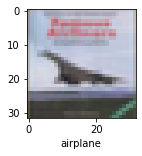

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and specify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1) ))

cnnModel.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModel.add(layers.MaxPooling2D((2,2)))


# layer 2 with L1-L2 with Regularizers
cnnModel.add(layers.Dense(30, activation='relu', 
                          kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                          activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01) ) )


# Layer 3
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu" ))
cnnModel.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModel.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))

cnnModel.summary()


NameError: ignored

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.evaluate(X_test,y_test)